# NetCDF files and xarray


This notebook aims to introduce the ***basic*** principles of working with NetCDF files using the Python library xarray. NetCDF (Network Common Data Form) is a file format used for storing array-oriented scientific data, especially in fields such as meteorology, oceanography, and climate science.

xarray builds on top of NumPy and pandas to provide a way to handle multi-dimensional labeled data. It is well-suited for working with NetCDF files, enabling efficient data loading, inspection, manipulation, and visualization. Xarray offers plenty of in-built functionality. I highly recommend you check out the [xarray documentation](https://docs.xarray.dev/en/stable/) if you need to perform advanced data manipulation, analysis, or visualization on your datasets. If you need more help, I recommend the [45-min Tutorial by xarray](https://tutorial.xarray.dev/overview/xarray-in-45-min.html).

In this notebook, we will cover:

- How to open and explore NetCDF files using xarray
- Accessing and slicing data
- Basic operations and visualization

***Feel free to work through the examples at your own pace and needs. This notebook is only intended to help you work efficiently during your project, and it's designed as a practical guide rather than a comprehensive tutorial.***

In [2]:
import xarray as xr # handle netcdf files
import matplotlib.pyplot as plt #for plotting
import cartopy.crs as ccrs #for map projection
import cartopy.feature as cfeature #adding features to the map


Now follows a very basic introduction to NetCDF and xarray handling. As a first step, we'll load some data.

---

### Task 1: Browsing Through Data Files

In [3]:
data = xr.open_dataset('tutorialdata.nc').load()

Hint: In order to open all files within a folder (e.g. all years within the study period) you can use the function <code> xr.open_mfdataset(folderpath+'*.nc', combine='by_coords') </code>.

You can explore the general structure of the file simply by calling it. This will display information about its dimensions, coordinates, data variables, and additional metadata (attributes). Of course, this is only possible when the person who created the file did a good job at documenting. Based on this, you should be able to answer the following questions:

1. What type of data is stored in this file? What is the name of the variable, and what does it represent? Which Units?
2. What is the spatial resolution and extent of the data?
3. What is the temporal resolution, and what time span does the dataset cover?

In [4]:
data

<xarray.Dataset> Size: 1MB
Dimensions:  (time: 366, lat: 22, lon: 22)
Coordinates:
  * lon      (lon) float64 176B 4.75 5.25 5.75 6.25 ... 13.75 14.25 14.75 15.25
  * lat      (lat) float64 176B 55.25 54.75 54.25 53.75 ... 45.75 45.25 44.75
  * time     (time) datetime64[ns] 3kB 2000-01-01 2000-01-02 ... 2000-12-31
Data variables:
    t2m      (time, lat, lon) float64 1MB 280.6 280.6 280.7 ... 277.7 273.4
Attributes:
    title:              Daily mean surface air temperature (2-meter height)
    version:            ERA5
    reference:          https://cds.climate.copernicus.eu/cdsapp#!/dataset/re...
    created on Server:  2024-04-03 09:14:54.225714
    provided by:        https://cds.climate.copernicus.eu/cdsapp#!/software/a...
    created by:         Hao Huang (hao.huang@ecoclim.uni-freiburg.de)
    creation way:       This dataset has been aggregated at daily frequency (...
    Conventions:        CF-1.7
    institution:        European Centre for Medium-Range Weather Forecasts
    history:            2024-03-22T17:24 GRIB to CDM+CF via cfgrib-0.9.9.1/ec...
    source:             ECMWF

---

## Visualisation

For the visualisation of the data there is two possible options.

1. Point‐wise time series:

Select one or more specific grid points (e.g. a particular latitude–longitude pair, or a small region) and plot how the daily mean temperature evolves over time. This lets you examine temporal features such as seasonal cycles, heat waves, or cold snaps at a fixed location.

2. Spatial maps:

Compute aggregated fields (e.g. monthly or seasonal means, anomalies, extremes) and plot them over the entire latitude–longitude grid. This can help you to understand spatial patterns.


### Task 2:
Visualize the temperature evolution in a grid cell near Freiburg. You can use <code> dataset.sel(lat=..., lon=..., method='nearest') </code> to choose a specific location. To access a specific variable you choose <code> dataset.variable_name </code> or <code> dataset['variable_name'] </code>.

In [ ]:
temp_freiburg = #add your code here

#add code for visualisation


---

### Task 3: Display Maximum/Minimum Temperature
Now load in the full time period for the daily average temperature (you can find the data in the google drive or on your computer from yesterday). Determine the day of the minimum and the day of the maximum temperature near Freiburg. You can use xarrays inbuilt function <code> dataset.variable.max(dim='time') </code> for this. 
Display both the temporal evolutions as well as the maxima/minima in a plot.

(Hint: If you're familiar with Pandas terminology, you'll find that xarray's syntax is heavily inspired by it)

In [ ]:
temp_full_time = xr.open_mfdataset(#add path here, combine='by_coords').load()
#select freiburg

In [ ]:
# add you code for visualisation here 


---

### Task 4 Observing trends in mean annual temperature
Calculate the mean annual temperature for Freiburg and display it. Can you observe a trend?

In [ ]:
annual_temp_freiburg = # add your code here

The handy thing about xarray is that you could have performed all the previous operations simultaneously across the entire dataset. As long as you specify the dimension of operation (e.g., dim='time'), functions like max, min, and groupby are applied in parallel to all grid cells. This is much faster than looping over the individual grid cells. There's no need to select a specific location like Freiburg at the beginning using .sel()—you can work with the full spatial dataset and extract specific locations later if needed. 

In [107]:
mean_t2m_yearly = temp_full_time.groupby('time.year').mean(dim='time')
mean_t2m_yearly

<xarray.Dataset> Size: 93kB
Dimensions:  (year: 24, lat: 22, lon: 22)
Coordinates:
  * lon      (lon) float64 176B 4.75 5.25 5.75 6.25 ... 13.75 14.25 14.75 15.25
  * lat      (lat) float64 176B 55.25 54.75 54.25 53.75 ... 45.75 45.25 44.75
  * year     (year) int64 192B 2000 2001 2002 2003 2004 ... 2020 2021 2022 2023
Data variables:
    t2m      (year, lat, lon) float64 93kB 10.09 10.14 10.21 ... 15.19 12.92
Attributes:
    title:              Daily mean surface air temperature (2-meter height)
    version:            ERA5
    reference:          https://cds.climate.copernicus.eu/cdsapp#!/dataset/re...
    created on Server:  2024-04-03 09:14:54.225714
    provided by:        https://cds.climate.copernicus.eu/cdsapp#!/software/a...
    created by:         Hao Huang (hao.huang@ecoclim.uni-freiburg.de)
    creation way:       This dataset has been aggregated at daily frequency (...
    Conventions:        CF-1.7
    institution:        European Centre for Medium-Range Weather Forecasts
    history:            2024-03-22T17:24 GRIB to CDM+CF via cfgrib-0.9.9.1/ec...
    source:             ECMWF

You should now see that the structure of the dataset has changed. Instead of containing daily values, the time dimension has been reduced to just 24 entries—one for each year—representing the annual mean temperatures. The spatial dimension/coordinates remained unchanged.

This brings us to the next step—moving beyond individual locations to explore potential spatial patterns across the entire dataset.

---


### Task 5: Spatial Visualization
In order to create maps you can use [cartopy](https://scitools.org.uk/cartopy/docs/latest/). It comes with some inbuilt features like coastlines, boarders and projections. 

Set up the Figure: To create a map, first, initialize a figure with the desired projection. For gridded data (like the ERA5 data), PlateCarree is a common projection, as it is simple and works well for global data.

This is an example on how to set up a map, with some basic features. (You won't need all of these features to visualize your data.)

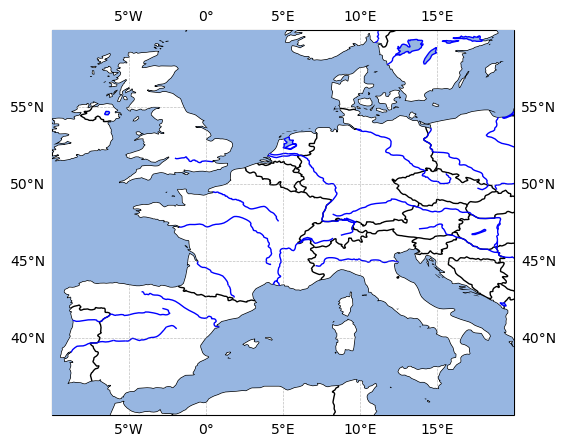

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(50, 5), subplot_kw={'projection': ccrs.PlateCarree()}) #add cartopy projection
#add coastlines
ax.add_feature(cfeature.COASTLINE)
#add borders
ax.add_feature(cfeature.BORDERS)
#to add oceans
ax.add_feature(cfeature.OCEAN, zorder=100)
#add rivers
ax.add_feature(cfeature.RIVERS, edgecolor='blue')
#to add lakes
ax.add_feature(cfeature.LAKES, edgecolor='blue')


#to add gridlines
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
#set extent of the map
ax.set_extent([-10, 20, 35, 60], crs=ccrs.PlateCarree())


---


In a next step, we can fill this map with data
### Task 6: Display Data on map
Determine the maximum and minimum temperature for each grid and display it in two subplots. You can use xarrays inbuilt function dataarray.plot(ax=name_ax, cmap=...,) to display the results in the figure you create.

In [ ]:
max_t2m = #add your code here
min_t2m = #add your code here

In [ ]:
fig, axs = #add your code here

for ax in axs:
    # only add in the features you think are necessary for the map

axs[0].set_title('#add your code here')
max_t2m.plot(#add your code here)

axs[1].set_title('#add your code here')
min_t2m.plot(#add your code here)

plt.show()

---


## ⚙️ A Word on Computational Performance

Especially if you're working with NetCDF files and want to perform the **same operation across many grid points** (e.g., entire latitude-longitude arrays), your choice of implementation can have a big impact on **execution time and scalability**.

While it's tempting to write nested loops to iterate over latitude and longitude dimensions, this approach becomes inefficient very quickly. We've already discussed that xarrays inbuilt functions are typically much faster than self programmed looping. But even if there is no predefined function within xarrays libary there are options to improve the performance. One of these tools is 
[`apply_ufunc`](https://docs.xarray.dev/en/stable/generated/xarray.apply_ufunc.html), which allows you to define functions based on what you would perform on an individual grid cell and then easily vectorize it to make it faster. The Waterbalance model within the course can run within seconds if implemented correctly or hours if performed using a simple loop.


In this section, we'll compare the two approaches to highlight how and when vectorization pays off. 
For each grid cell, the days above 20°C are calculated (Input Data should be in Kelvin!):



In [ ]:
import time
temp = xr.open_mf(#add path to temperature data, combine='by_coords').load()

In [8]:
# Function to calculate the number of days above 20°
def days_above20(temp_data):
    ''' How many days are above_20 degrees?'''
    # Convert temperature from Kelvin to Celsius
    temp_data_celsius = temp_data - 273.15
    # Count days above_20 degrees Celsius
    days_above_20 = (temp_data_celsius > 20).sum()
    return days_above_20

Loop version of the code:

In [ ]:
# 1. Loop over each lat/lon (Inefficient method)
start_time = time.time()
days_above_20_loop = []

for lat in temp['lat']:
    for lon in temp['lon']:
        temp_data = temp['t2m'].sel(lat=lat, lon=lon, method="nearest")  # Get data for each point
        days_above_20 = days_above20(temp_data)  # Apply the function
        days_above_20_loop.append((lat, lon, days_above_20))

loop_duration = time.time() - start_time
print(f"Loop method completed in {loop_duration:.5f} seconds.")

Vectorized version:

In [ ]:


# 2. Apply_ufunc (Efficient method)
start_time = time.time()
res = xr.apply_ufunc(
    days_above20, # function to vectorize
    temp['t2m'], # input data
    input_core_dims=[['time']], # calculate over time dimension
    vectorize=True,  # This allows for vectorized computation
    output_core_dims=[[]], #no dimensions because its a scalar
    output_dtypes=[float] # output data type
)

apply_ufunc_duration = time.time() - start_time
print(f"apply_ufunc method completed in {apply_ufunc_duration:.5f} seconds.")

print(f"Apply_ufunc was {loop_duration / apply_ufunc_duration:.2f} times faster than the loop method.")

In [ ]:
# plot the results on the map
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([temp.lon.min().item(), temp.lon.max().item(), temp.lat.min().item(), temp.lat.max().item()], crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
art = plt.pcolormesh(res['lon'], res['lat'], res, cmap='Reds', shading='auto', transform=ccrs.PlateCarree())
plt.colorbar(art, ax=ax, orientation='vertical', label='Days above 20 degrees (C)', shrink=0.8)
plt.show()

### 💬 Discussion: Looping vs. `apply_ufunc` in xarray

Of course, this is a bit of an arbitrary example, because both methods perform the task in a reasonable amount of time.

However, the differences in performance and scalability become much more pronounced as the dataset size and computational complexity increase. 


### 🧪 When Does It Matter?

The choice becomes critical when:

- You're working with **large spatial domains** (e.g., full Europe, global). This might be important to some of you switching to 0.1° spatial resolution.
- The function you're applying is **more complex** than a simple threshold count (e.g., fitting models, computing indices, applying conditional logic).

In such cases, `apply_ufunc` offers a much more scalable and efficient approach than looping over grid points manually.

***If during your group work you feel like computational time becomes a limiting factor, just know that xarray has some nice built-in features for optimizing performance. If you need help on that just contact me :) ***
